#### Long to Wide Reshaping

##### df.pivot()

It takes in three arguments:
- index: takes the name of the column that we want the index to be
- columns: columns we want to have as the columns in dataframe
- values: values we want to populate with in the new datafram

Example:
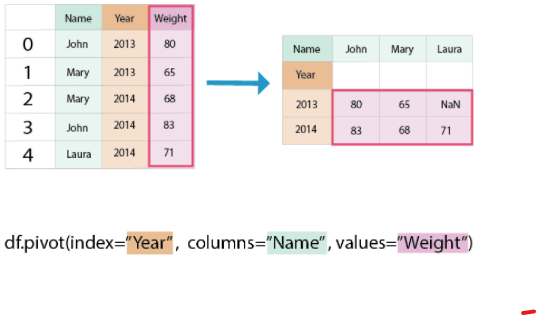

- Missing NaN values will be populated where a matching value for the new dataframe is not found

##### extending the pivot to all the columns, by omitting the "values" argument

- but sometimes there might be an error for this transposition
- this can happen when pandas is confused with repeated values

In [ ]:
#there can be multiple columsn for the values
df = df.pivot(index="column1", columns="movement", values=["overall", "attacking"])

In [ ]:
#dropping the 5th row
df = df.drop(4, axis=0)

Pivot Method Limitations
- general purpose pivoting
- index/column pairs must be UNIQUE | This is because the pivot method cannot aggregate values
- the solution is using the pivot_table method which can also summarize aggregations

df.pivot_table arguments:
- all the arguments of the pivot() method along with an aggfunc
- if we omit the aggfunc, pandas will default to average

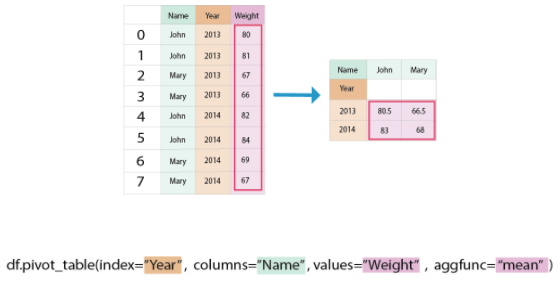

Advantage of Pivot_tables
- can have multi-indexes

In [ ]:
df.pivot_table(index = ["column1", "column2"],
              columns = "column3",
              values = ["column4", "column5"],
              aggfunc="max")

- Margins argument (also can be seen below in another example)
    - as "True" all rows and columns will be added

##### .groupby() versus .pivot_table()

In [ ]:
#using groupby
df.groupby("column1")["column2"].mean()

#versus the pivottable
df.pivot_table(values="column2",
               index="column1"
              )

#the index here takes the form of the groupby in the pivot table format

In [ ]:
#different statistics function similarly in pivottable as with the .agg()

import numpy as np
df.pivot_table(values = "column2",
              index = "column1",
              aggfunc=np.median)   #if passing more than one use []

In [ ]:
#pivot tables (grouping) by two variables
#again comparing to groupby
df.groupby(["column1", "column2"])["column3"].mean()

#using the equivalent with the pivot_table method
df.pivot_table(values="column3",
              index="column1",
              columns="column2",
              fill_value=0,       #filling the NaN's with zeros
              margins=True        #last column contains sum of each row
              ) 

"Pivot tables are just DataFrames with sorted indexes."

##### the axis argument

In [ ]:
df.mean(axis="index")  #across the rows
df.mean(axis="columns") #across the columns

In [ ]:
#example:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index = ["country", "city"], columns = "year")

# See the result
print(temp_by_country_city_vs_year)

##### When to use .pivot() or .pivot_table()?

- are you dealing with more than one value for each index/column pair?
- is a multi-level index needed?
- need summary statistics of large DataFrame?